Saving Crop_recommendation.csv to Crop_recommendation.csv
🔹 Shape of the dataset: (2200, 8)
🔹 Column names: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
🔹 Checking for missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
🔹 Dataset summary:
                  N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.0000

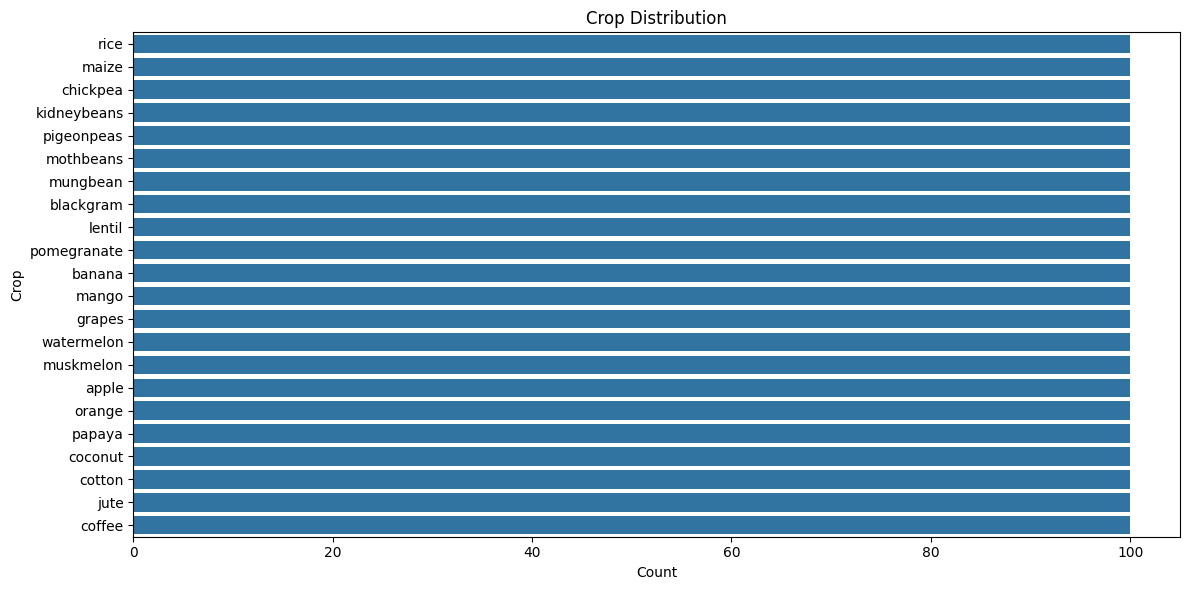

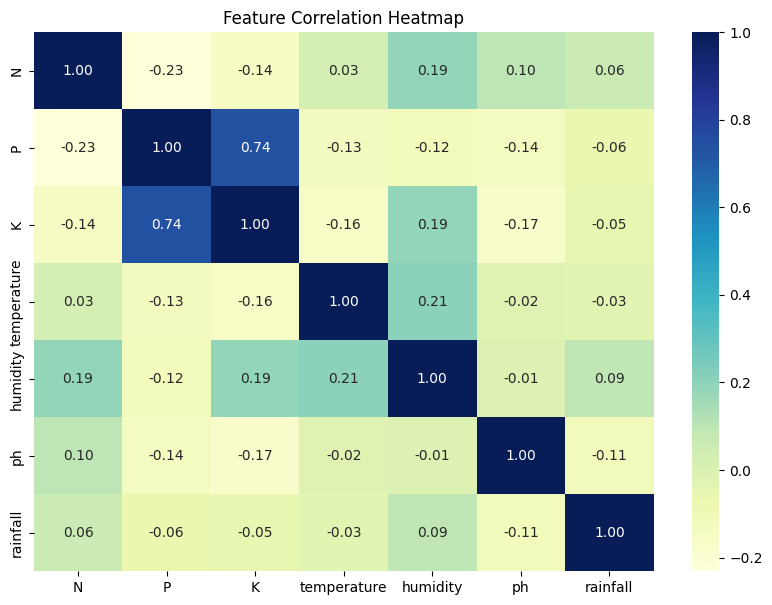

🔍 Accuracy: 0.9931818181818182

📄 Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00

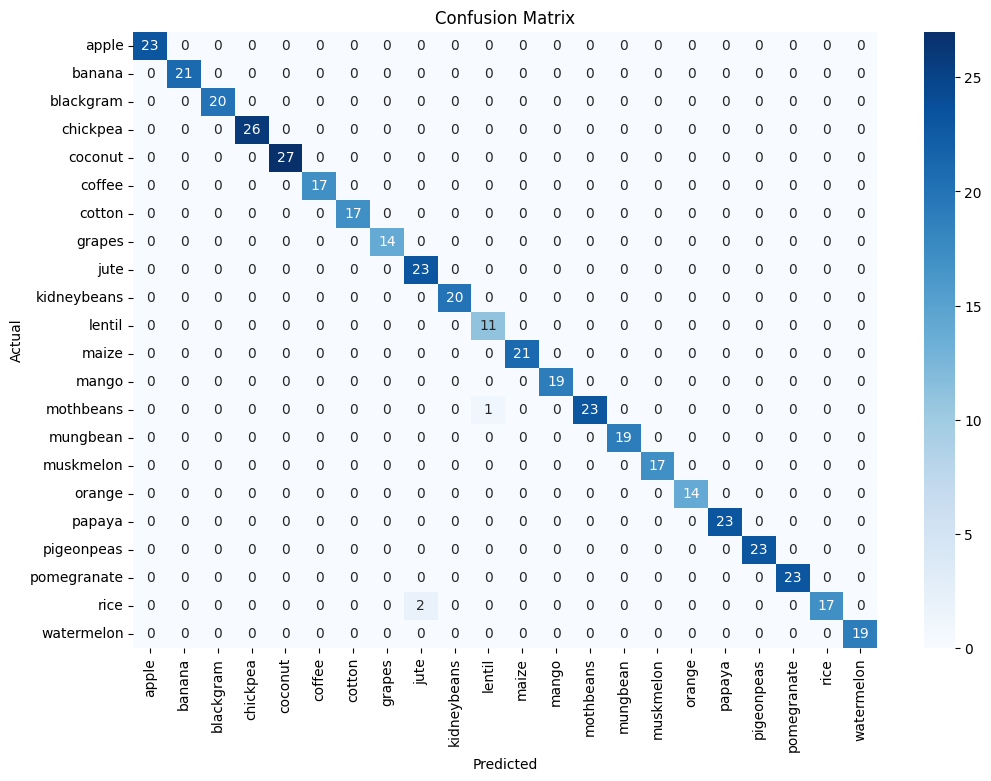

🌱 Recommended Crop: rice


In [1]:
# 📦 Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

# 📥 Load Dataset
uploaded = files.upload()
df = pd.read_csv('Crop_recommendation.csv')

# 📊 Basic EDA
print("🔹 Shape of the dataset:", df.shape)
print("🔹 Column names:", df.columns.tolist())
print("🔹 Checking for missing values:\n", df.isnull().sum())
print("🔹 Dataset summary:\n", df.describe())
print("🔹 Unique crops:\n", df['label'].value_counts())

# 📈 Data Visualization
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index)
plt.title('Crop Distribution')
plt.xlabel('Count')
plt.ylabel('Crop')
plt.tight_layout()
plt.show()

# 📊 Correlation Heatmap (excluding the target variable)
plt.figure(figsize=(10, 7))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# 🎯 Feature and Target Separation
X = df.drop('label', axis=1)
y = df['label']

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔄 Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🌲 Model Training: Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 🧾 Model Evaluation
y_pred = model.predict(X_test_scaled)
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# 📉 Confusion Matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ✅ Prediction Example
# Prepare sample input as DataFrame with feature names for consistent scaling
sample_data = {
    'N': [90],
    'P': [42],
    'K': [43],
    'temperature': [20.0],
    'humidity': [80.0],
    'ph': [6.5],
    'rainfall': [200]
}
sample_df = pd.DataFrame(sample_data)
sample_scaled = scaler.transform(sample_df)
predicted_crop = model.predict(sample_scaled)
print("🌱 Recommended Crop:", predicted_crop[0])
